In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="vJVmTas15r8AC9AFnOzE")
project = rf.workspace("material-identification").project("garbage-classification-3")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to GARBAGE-CLASSIFICATION-3-2 in yolov8:: 100%|██████████| 20940/20940 [00:03<00:00, 5262.61it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import shutil

destination_path = "/content/drive/MyDrive"

shutil.move("GARBAGE-CLASSIFICATION-3-2", destination_path)


In [ ]:
!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8s.pt

In [ ]:
import os
import json

def count_labels(dataset_path):
    label_counts = {}
    for filename in os.listdir(dataset_path):
        if filename.endswith(".txt"):  # Assuming labels are in .txt files
            filepath = os.path.join(dataset_path, filename)
            with open(filepath, "r") as f:
                for line in f:
                    try:
                        class_id = int(line.split()[0])
                        label_counts[class_id] = label_counts.get(class_id, 0) + 1
                    except (IndexError, ValueError):
                        print(f"Warning: Skipping invalid line in {filename}: {line.strip()}")

    return label_counts

train_path = "/content/GARBAGE-CLASSIFICATION-3-2/train/labels"
test_path = "/content/GARBAGE-CLASSIFICATION-3-2/test/labels"
valid_path = "/content/GARBAGE-CLASSIFICATION-3-2/valid/labels"

train_labels = count_labels(train_path)
test_labels = count_labels(test_path)
valid_labels = count_labels(valid_path)

print("Train Label Counts:", train_labels)
print("Test Label Counts:", test_labels)
print("Validation Label Counts:", valid_labels)


Train Label Counts: {4: 2981, 2: 5429, 0: 31721, 3: 3948, 5: 4146, 1: 3386}
Test Label Counts: {4: 1376, 5: 1585, 3: 533, 0: 49, 1: 20}
Validation Label Counts: {1: 1292, 0: 13637, 2: 2380, 3: 1360, 5: 214, 4: 33}


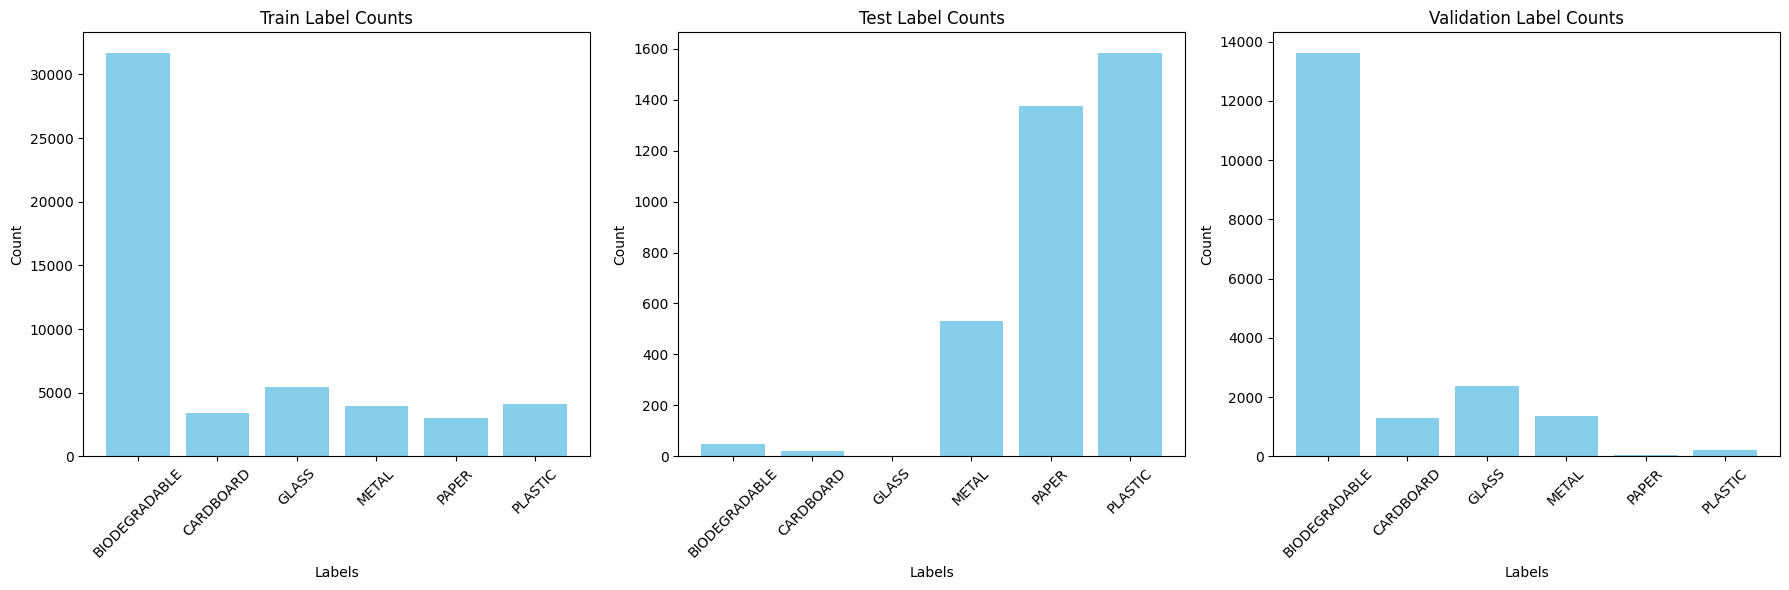

In [ ]:
import matplotlib.pyplot as plt

def visualize_label_counts_subplot(label_counts_list, titles):
    labels = {
        0: "BIODEGRADABLE",
        1: "CARDBOARD",
        2: "GLASS",
        3: "METAL",
        4: "PAPER",
        5: "PLASTIC"
    }

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for idx, (label_counts, title) in enumerate(zip(label_counts_list, titles)):
        for i in range(6):
            if i not in label_counts:
                label_counts[i] = 0

        sorted_counts = dict(sorted(label_counts.items()))
        x_labels = [labels[key] for key in sorted_counts.keys()]
        y_counts = list(sorted_counts.values())

        axes[idx].bar(x_labels, y_counts, color='skyblue')
        axes[idx].set_xlabel("Labels")
        axes[idx].set_ylabel("Count")
        axes[idx].set_title(title)
        axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

visualize_label_counts_subplot(
    [train_labels, test_labels, valid_labels],
    ["Train Label Counts", "Test Label Counts", "Validation Label Counts"]
)


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/GARBAGE-CLASSIFICATION-3-2/data.yaml epochs=100 imgsz=640

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/GARBAGE-CLASSIFICATION-3-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c